In [1]:
import torch
import matplotlib.pyplot as plt
import os
import numpy as np
from PIL import Image
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode
init_notebook_mode(connected = True)
%matplotlib inline

In [2]:
def print_segmentation_mask(array, t=0.5):
    assert len(array[array < 0]) == 0
    arr = array.copy()
    arr[arr > t] = 1
    arr[arr <= t] = 0
    plt.imshow(arr)
    plt.show()

In [5]:
!ls ../runs/detect/exp

exp  exp2  exp3  exp4  exp5  exp6  exp7  exp8  exp9


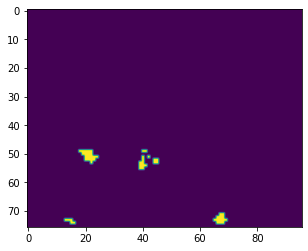

In [43]:
s16 = np.load("../runs/detect/exp9/117/stage16_Concat_features.npy")
s16_orig = s16.mean(axis=0)
s16_norm = (s16_orig - np.min(s16_orig)) / (np.max(s16_orig) - np.min(s16_orig))
fig = go.Figure(data=[go.Histogram(x=s16_orig.reshape(-1,))])
fig.update_layout(title="orig")
#fig.show()
fig = go.Figure(data=[go.Histogram(x=s16_norm.reshape(-1,))])
fig.update_layout(title="orig")
#fig.show()
print_segmentation_mask(s16_norm, 0.5)

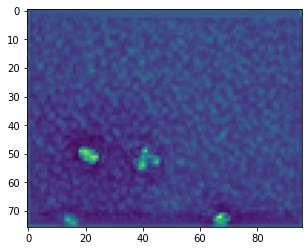

In [27]:
plt.imshow(s16_norm)
plt.show()

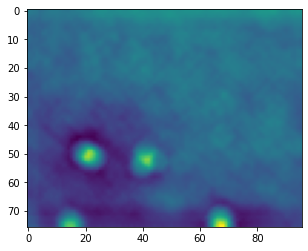

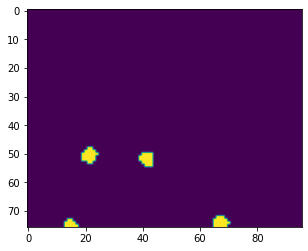

In [53]:
import cv2
plt.imshow(cv2.bilateralFilter(s16_norm, 8, 100, 100))
plt.show()
print_segmentation_mask(cv2.bilateralFilter(s16_norm, 8, 100, 100), 0.3)

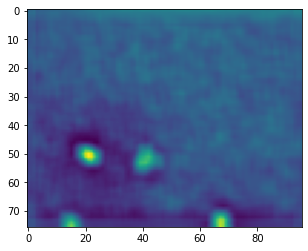

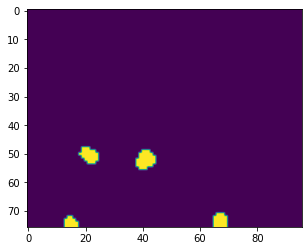

In [69]:
plt.imshow(cv2.blur(s16_norm, (5, 5)))
plt.show()
print_segmentation_mask(cv2.blur(s16_norm, (5, 5)), 0.3)

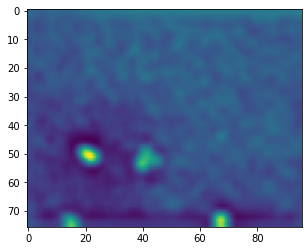

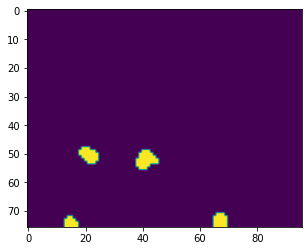

In [65]:
plt.imshow(cv2.GaussianBlur(s16_norm, (5, 5), 2))
plt.show()
print_segmentation_mask(cv2.GaussianBlur(s16_norm, (5, 5), 2), 0.3)

In [116]:
np.percentile(s16_norm.reshape(-1), 101)

ValueError: Percentiles must be in the range [0, 100]

In [118]:
np.percentile(s16_norm, 90)

0.2881336510181427

In [126]:
def get_mask(im, t=0.3):
   # t = np.percentile(im, 99)
    im[im > t] = 1
    im[im <= t] = 0
    return im

file=110


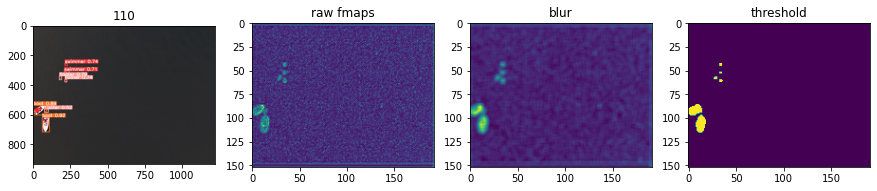

file=1136


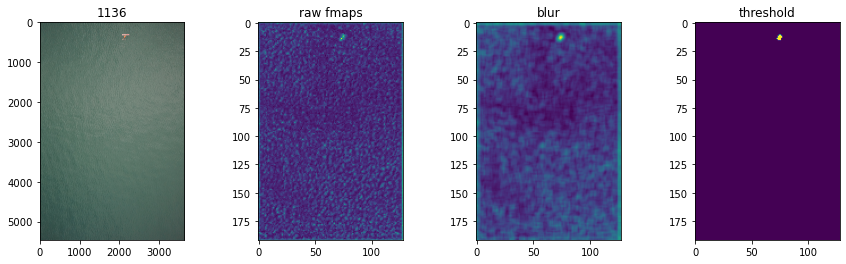

file=117


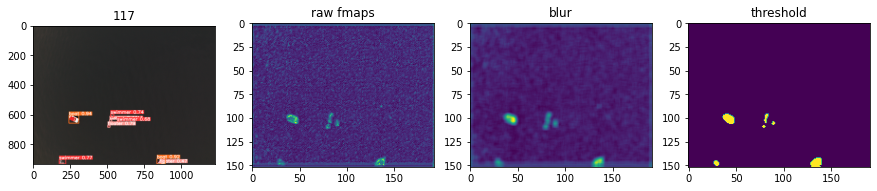

file=1174


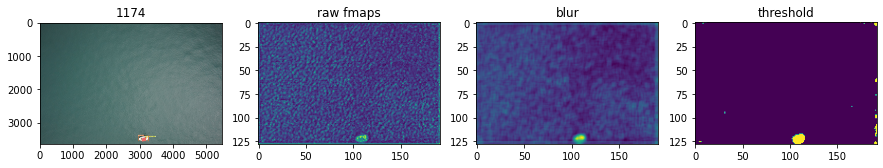

file=3482


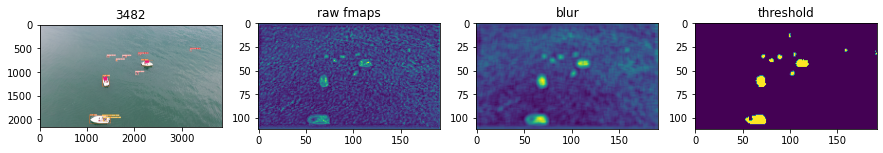

file=4156


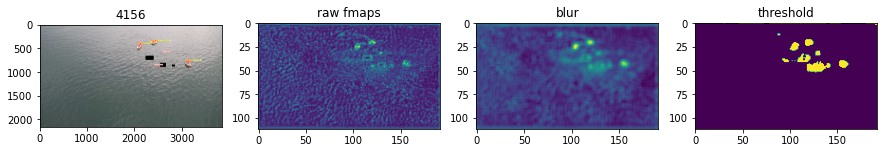

file=5524


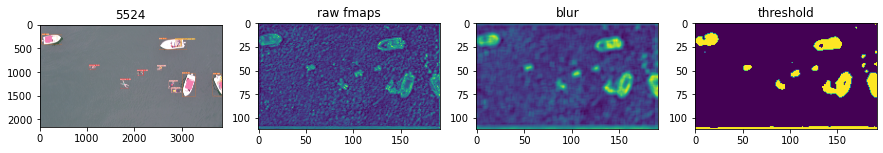

file=1116


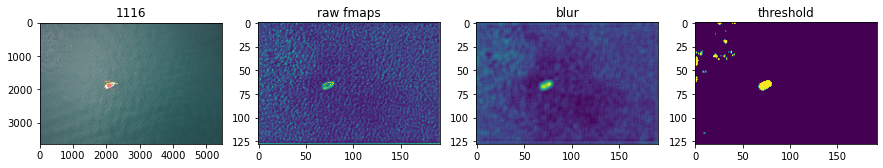

file=1155


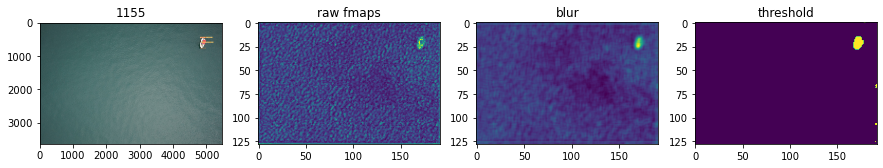

file=1172


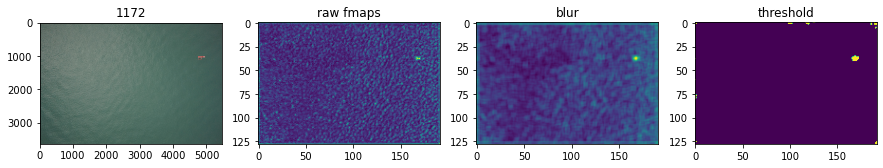

file=1194


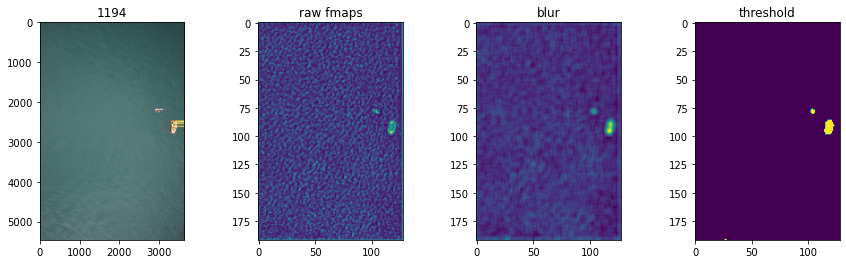

file=3660


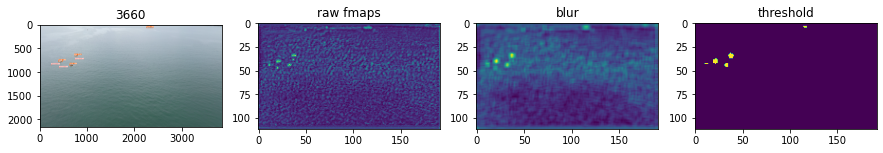

file=5486


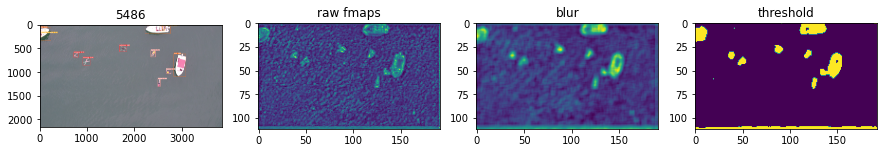

file=2175


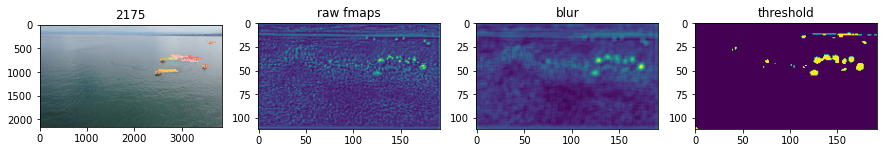

file=2991


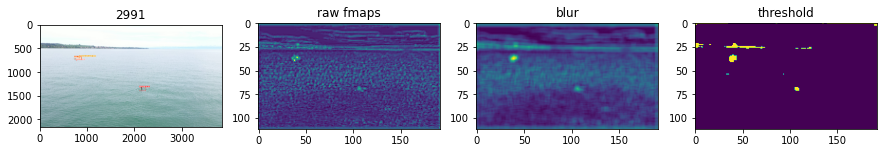

file=3005


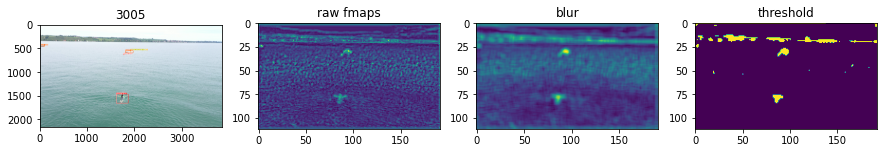

file=3039


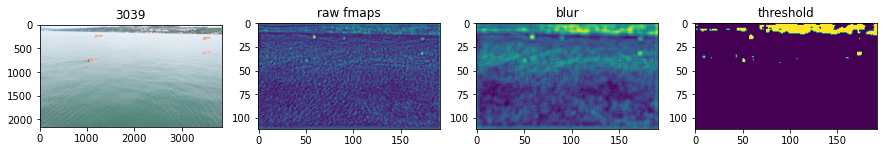

In [129]:
arr = ["110", "1136", "117", "1174", "3482", "4156", "5524", "1116", "1155", "1172", 
       "1194", "3660", "5486", "2175", "2991", "3005", "3039"]
path =  "../runs/detect/exp8"

'''
Saving ../runs/detect/exp9/110/stage0_Conv_features.png... (32/64)
Saving ../runs/detect/exp9/110/stage1_Conv_features.png... (32/128)
Saving ../runs/detect/exp9/110/stage2_C3_features.png... (32/128)
Saving ../runs/detect/exp9/110/stage3_Conv_features.png... (32/256)
Saving ../runs/detect/exp9/110/stage4_C3_features.png... (32/256)
Saving ../runs/detect/exp9/110/stage5_Conv_features.png... (32/512)
Saving ../runs/detect/exp9/110/stage6_C3_features.png... (32/512)
Saving ../runs/detect/exp9/110/stage7_Conv_features.png... (32/1024)
Saving ../runs/detect/exp9/110/stage8_C3_features.png... (32/1024)
Saving ../runs/detect/exp9/110/stage9_SPPF_features.png... (32/1024)
Saving ../runs/detect/exp9/110/stage10_Conv_features.png... (32/512)
Saving ../runs/detect/exp9/110/stage11_Upsample_features.png... (32/512)
Saving ../runs/detect/exp9/110/stage12_Concat_features.png... (32/1024)
Saving ../runs/detect/exp9/110/stage13_C3_features.png... (32/512)
Saving ../runs/detect/exp9/110/stage14_Conv_features.png... (32/256)
Saving ../runs/detect/exp9/110/stage15_Upsample_features.png... (32/256)
Saving ../runs/detect/exp9/110/stage16_Concat_features.png... (32/512)
Saving ../runs/detect/exp9/110/stage17_C3_features.png... (32/256)
Saving ../runs/detect/exp9/110/stage18_Conv_features.png... (32/256)
Saving ../runs/detect/exp9/110/stage19_Concat_features.png... (32/512)
Saving ../runs/detect/exp9/110/stage20_C3_features.png... (32/512)
Saving ../runs/detect/exp9/110/stage21_Conv_features.png... (32/512)
Saving ../runs/detect/exp9/110/stage22_Concat_features.png... (32/1024)
Saving ../runs/detect/exp9/110/stage23_C3_features.png... (32/1024)
'''

for a in arr:
    print(f"file={a}")
    image = Image.open(f'{path}/{a}.png')
    arr = np.load(os.path.join(f'{path}/{a}', " .npy"))
    fmaps = arr.mean(axis=0)
    fmaps = (fmaps - np.min(fmaps)) / (np.max(fmaps) - np.min(fmaps))
    blur = cv2.blur(fmaps, (5, 5))
    f, axarr = plt.subplots(1, 4, figsize=(15,4))
    axarr[0].imshow(image)
    axarr[0].set_title(a)
    axarr[1].imshow(fmaps)
    axarr[1].set_title("raw fmaps")
    axarr[2].imshow(blur)
    axarr[2].set_title("blur")
    axarr[3].imshow(get_mask(blur))
    axarr[3].set_title("threshold")
    plt.show()

file=110


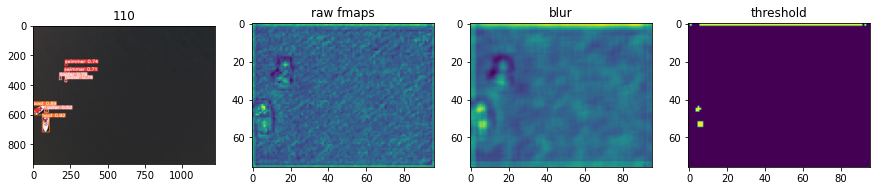

file=1136


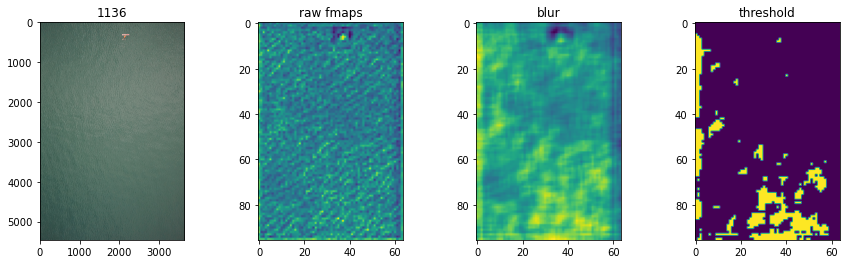

file=117


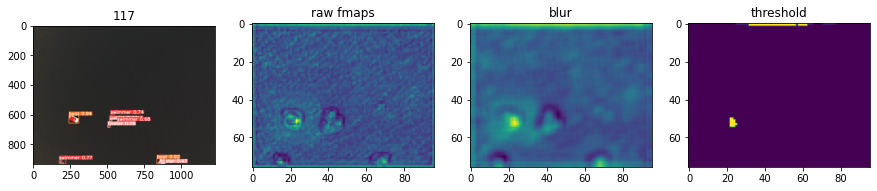

file=1174


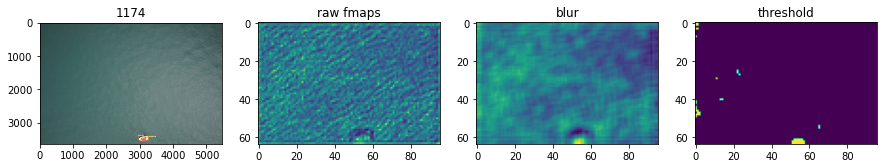

file=3482


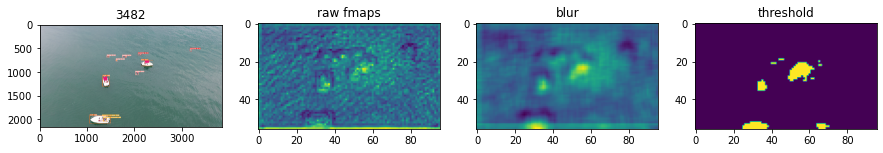

file=4156


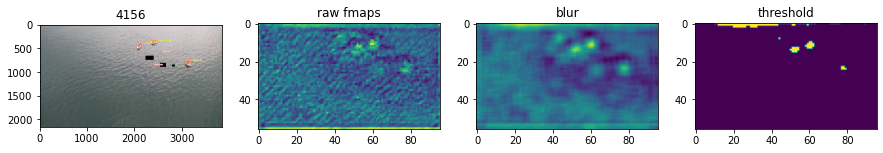

file=5524


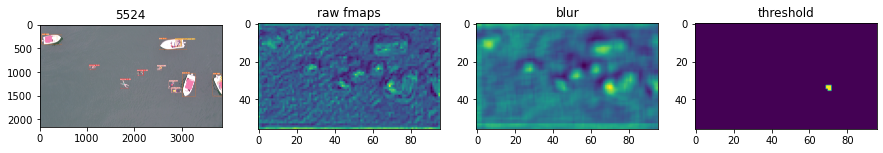

file=1116


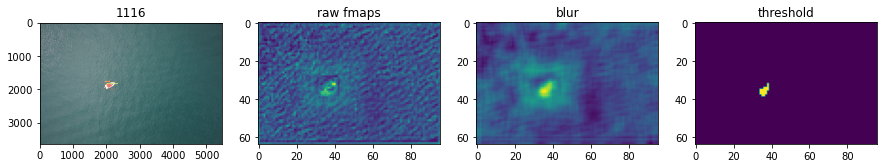

file=1155


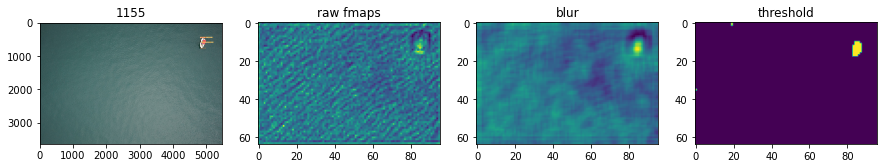

file=1172


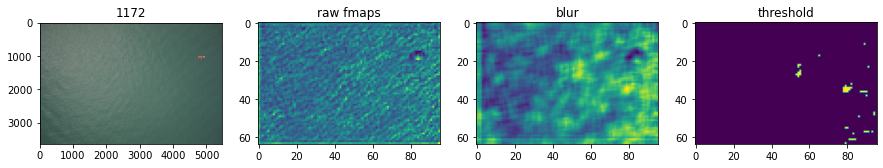

file=1194


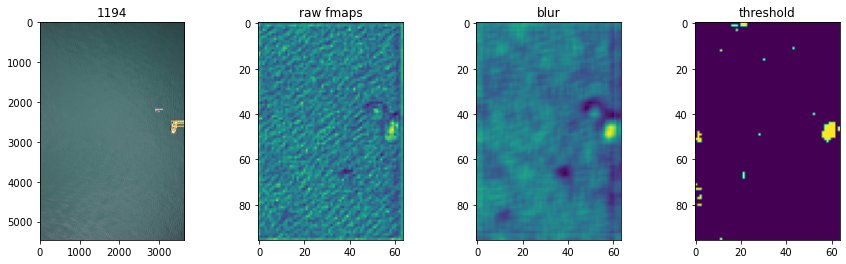

file=3660


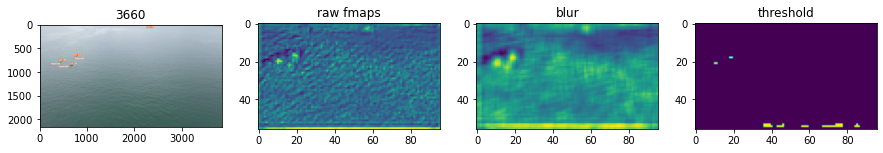

file=5486


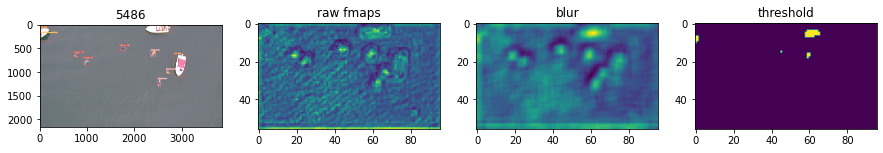

file=2175


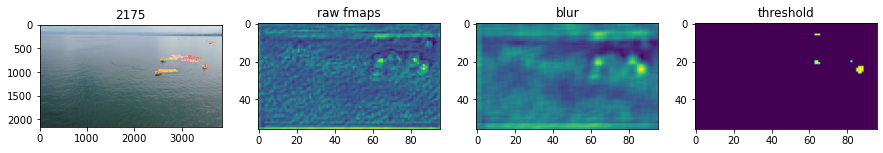

file=2991


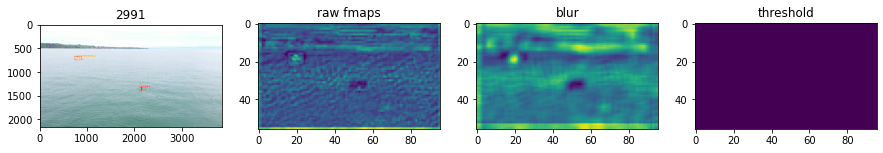

file=3005


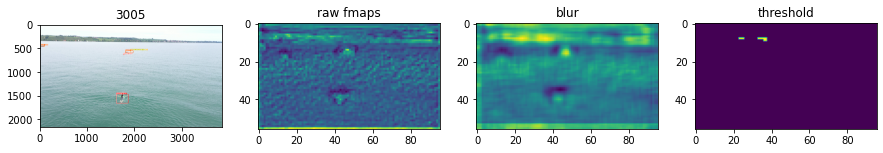

file=3039


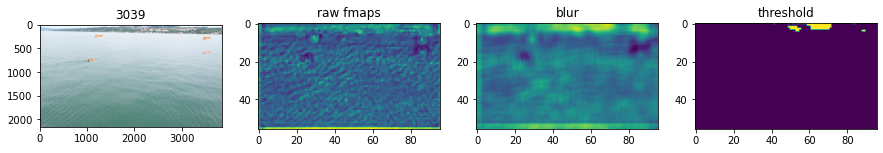

In [106]:
arr = ["110", "1136", "117", "1174", "3482", "4156", "5524", "1116", "1155", "1172", 
       "1194", "3660", "5486", "2175", "2991", "3005", "3039"]
path =  "../runs/detect/exp8"
for a in arr:
    print(f"file={a}")
    image = Image.open(f'{path}/{a}.png')
    arr = np.load(os.path.join(f'{path}/{a}', "stage16_Concat_features.npy"))
    fmaps = arr.mean(axis=0)
    fmaps = (fmaps - np.min(fmaps)) / (np.max(fmaps) - np.min(fmaps))
    blur = cv2.blur(fmaps, (5, 5))
  #  mask = print_segmentation_mask(blur, 0.3)
    f, axarr = plt.subplots(1, 4, figsize=(15,4))
    axarr[0].imshow(image)
    axarr[0].set_title(a)
    axarr[1].imshow(fmaps)
    axarr[1].set_title("raw fmaps")
    axarr[2].imshow(blur)
    axarr[2].set_title("blur")
    axarr[3].imshow(get_mask(blur))
    axarr[3].set_title("threshold")
    plt.show()

In [ ]:
print_segmentation_mask(cv2.идгк(s16_norm, ()), 0.3)

In [51]:
fig = go.Figure(data=[go.Histogram(x=cv2.bilateralFilter(s16_norm, 8, 100, 100).reshape(-1,))])
fig.show()

In [ ]:
print_segmentation_mask(cv2.bilateralFilter(s16_norm, 8, 100, 100), 0.3)

In [48]:
cv2.bilateralFilter(s16_norm, 8, 100, 100).reshape(-1)

array([0.24625991, 0.2370212 , 0.2351079 , ..., 0.16766268, 0.16738874,
       0.1697456 ], dtype=float32)

In [20]:
s16_norm

array([[0.3483256 , 0.2038394 , 0.2259212 , ..., 0.28426877, 0.25856942,
        0.362167  ],
       [0.3556603 , 0.20876263, 0.2412208 , ..., 0.27648777, 0.27152053,
        0.3997766 ],
       [0.296291  , 0.18835627, 0.20516777, ..., 0.2881719 , 0.2882279 ,
        0.31967774],
       ...,
       [0.2745376 , 0.1718691 , 0.13890105, ..., 0.14795074, 0.13609864,
        0.24691385],
       [0.22773522, 0.13312432, 0.1491547 , ..., 0.11845764, 0.12463482,
        0.24195811],
       [0.33538502, 0.312054  , 0.30273244, ..., 0.2552676 , 0.26303703,
        0.2893633 ]], dtype=float32)

file=117


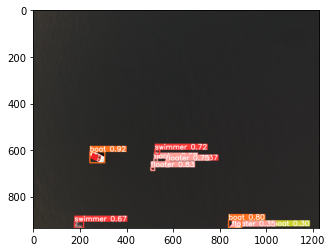

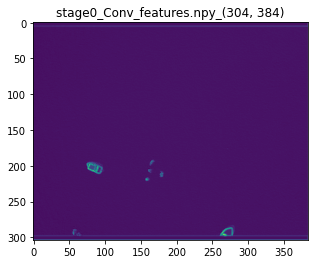

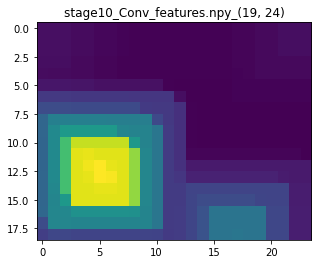

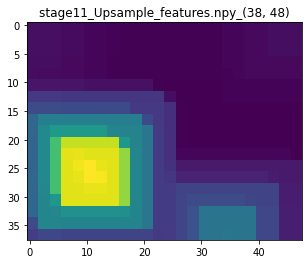

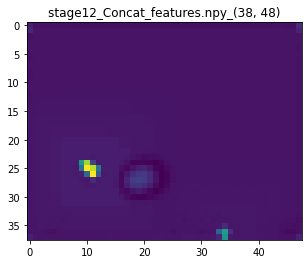

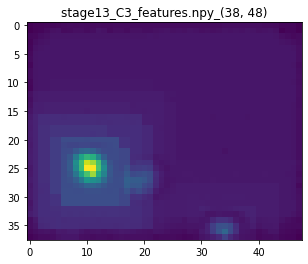

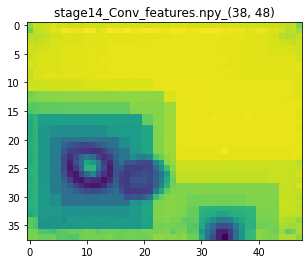

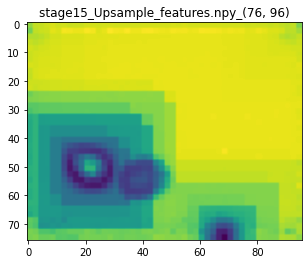

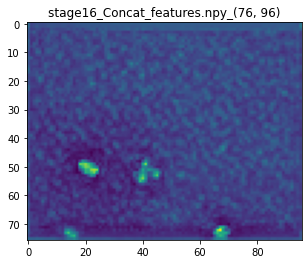

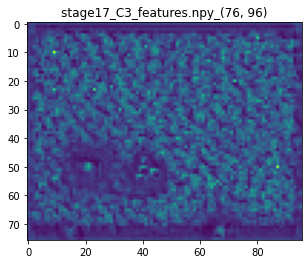

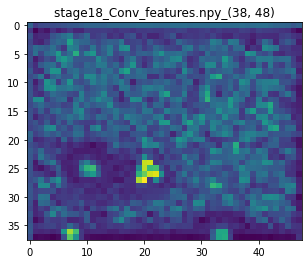

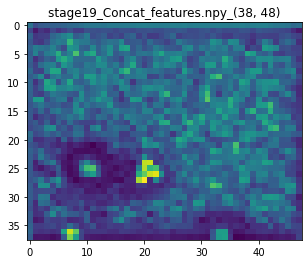

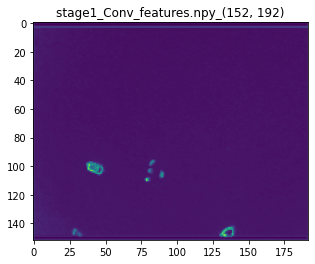

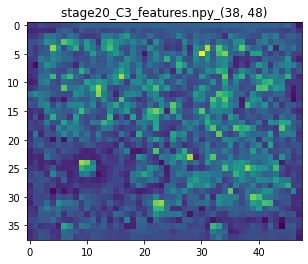

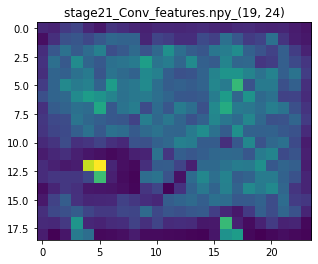

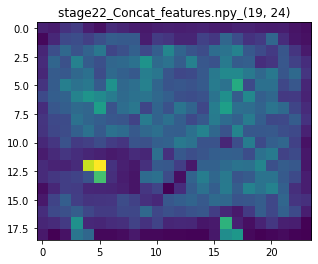

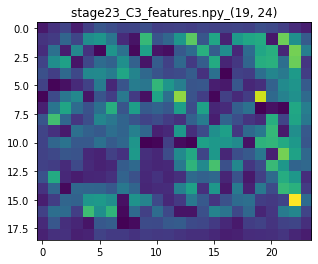

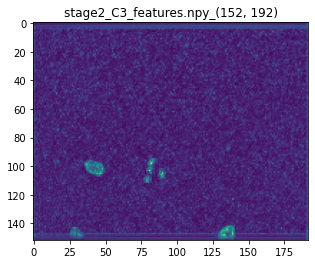

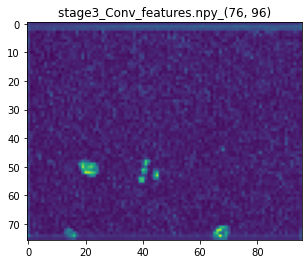

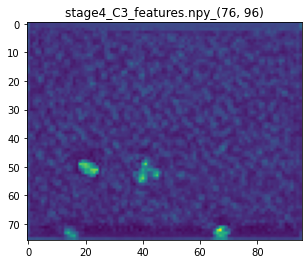

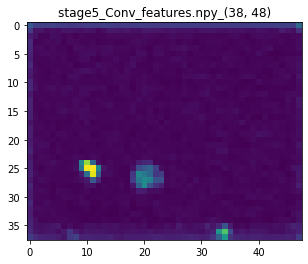

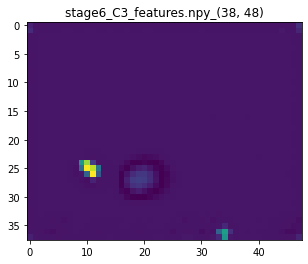

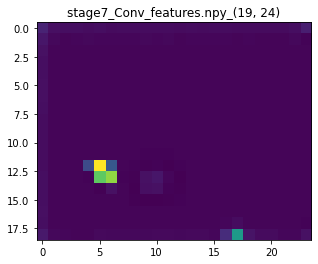

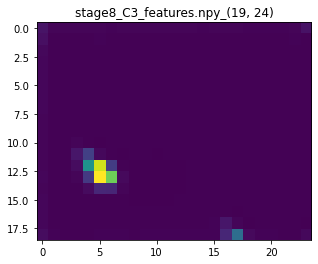

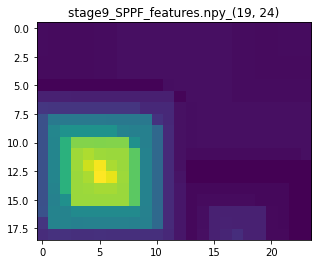

In [7]:
arr = ["117"]
path =  "../runs/detect/exp9"
for a in arr:
    print(f"file={a}")
    files = sorted(os.listdir(f'{path}/{a}'))
    image = Image.open(f'{path}/{a}.png')
    plt.imshow(image)
    plt.show()
    for file in files:
        if "npy" in file:
            arr = np.load(os.path.join(f'{path}/{a}', file))
            plt.imshow(arr.mean(axis=0))
            plt.title(f"{file}_{arr.mean(axis=0).shape}")
            plt.show()

In [11]:
from scipy.special import softmax

In [13]:
softmax(s16_orig.reshape(-1))

array([0.00014146, 0.00013702, 0.00013769, ..., 0.00013858, 0.00013882,
       0.00013963], dtype=float32)

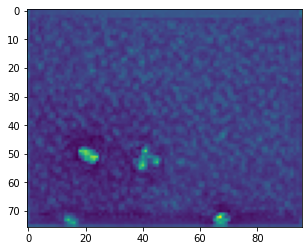

In [14]:
plt.imshow(softmax(s16_orig))
plt.show()

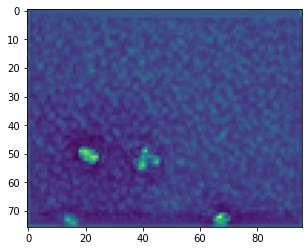

In [16]:
plt.imshow(s16_orig)

In [22]:
plt.show(s16_norm)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [21]:
s16_norm.shape

(76, 96)

In [23]:
fig = go.Figure(data=[go.Histogram(x=s16_norm.reshape(-1,))])
fig.update_layout(title="norm")

In [24]:
fig = go.Figure(data=[go.Histogram(x=s16_orig.reshape(-1,))])
fig.update_layout(title="orig")